# Импорты

In [2]:
import subprocess
import sys

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    subprocess.run(["pip", "install", "catboost>=1.2.7"])

# Для более качественных графиков
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.dpi"] = 150

# Датасет California Housing Prices

## Загрузка данных

[Ссылка на файл датасета](https://drive.google.com/file/d/1SCYD2qDlrybLVfiFObKJS9bwUPJLpcIW/view?usp=sharing)

[Информация о датасете](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [3]:
df = pd.read_csv("housing.csv")
target = "median_house_value"
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [4]:
!pip install basemap

^C


  Obtaining dependency information for basemap from https://files.pythonhosted.org/packages/7f/ab/caf597d36e4ab9e5b3302d9fdeea4d652b002e314c617cb3a36bcf070f97/basemap-1.4.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for basemap-data<1.4,>=1.3.2 from https://files.pythonhosted.org/packages/2c/c3/63fdb885308c999206c7a497d79a50891581626da7dc491d432d2732bb46/basemap_data-1.3.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pyshp<2.4,>=1.2 from https://files.pythonhosted.org/packages/98/2f/68116db5b36b895c0450e3072b8cb6c2fac0359279b182ea97014d3c8ac0/pyshp-2.3.1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ------------- ------------------------ 20.5/56.0 kB 682.7 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/56.0 kB 330.3


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
!pip install basemap-data-hires

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 5.8 MB/s eta 0:00:00


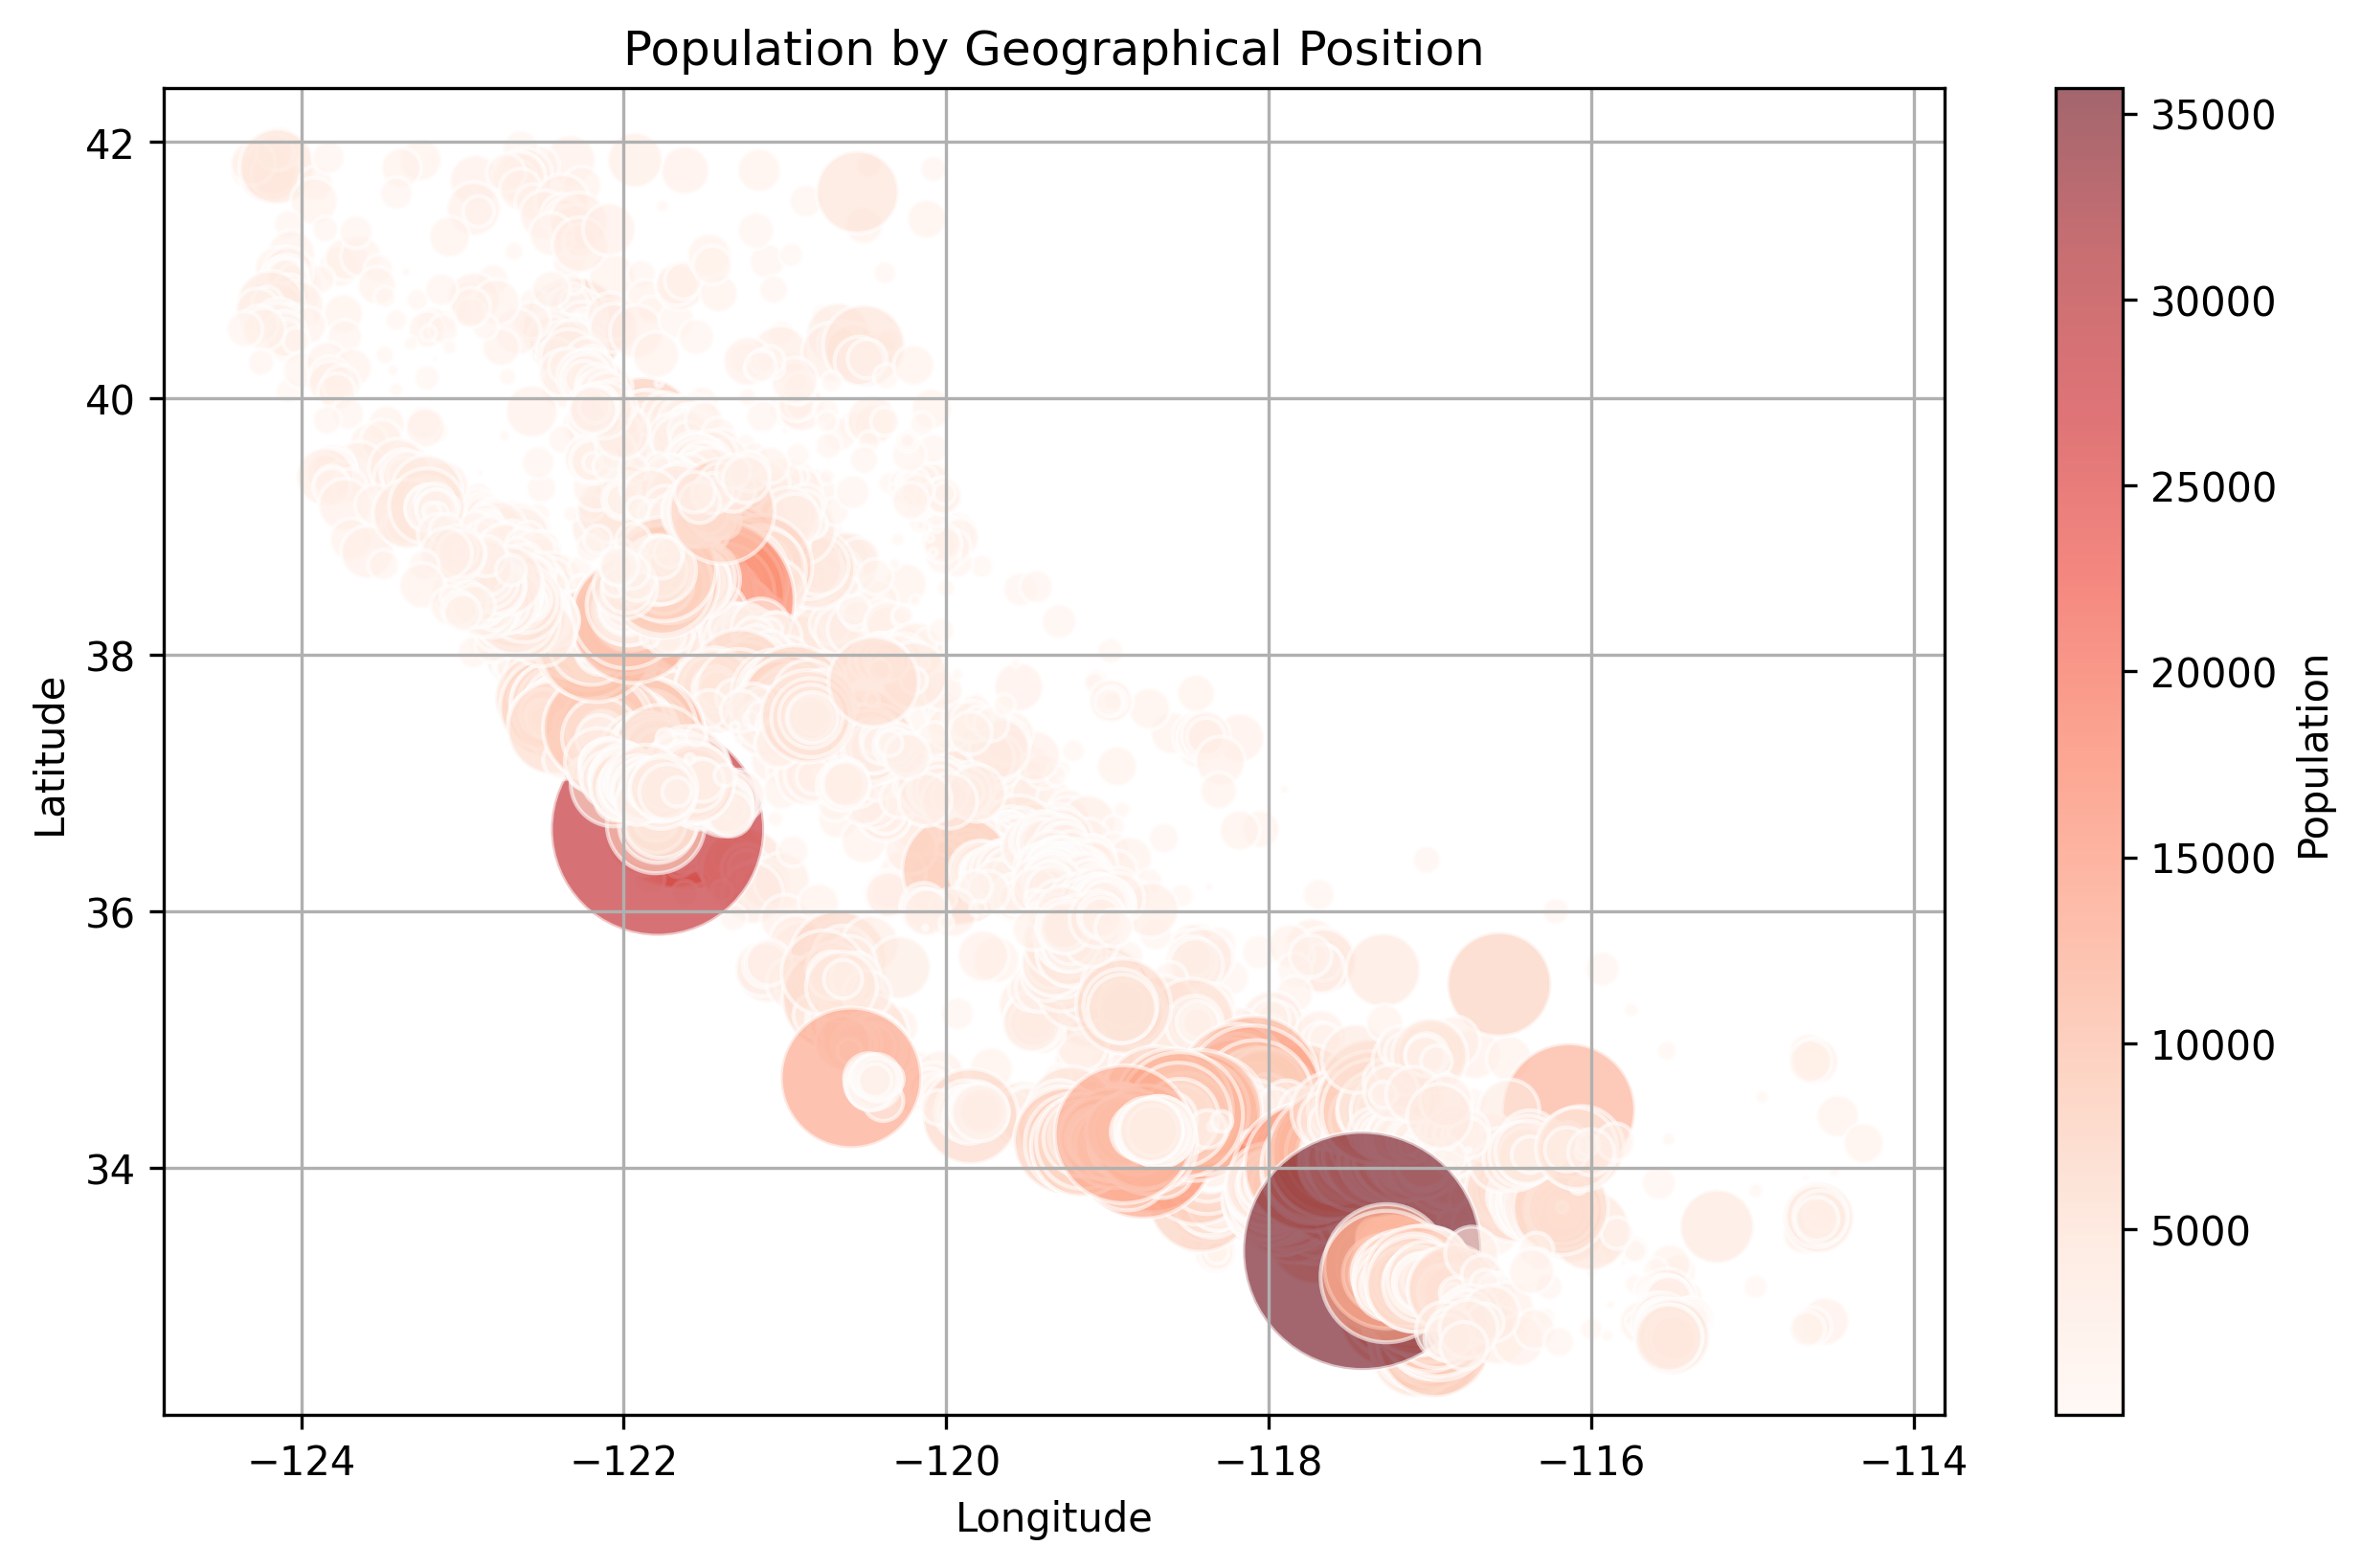

In [18]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['longitude'], df['latitude'],
                      s=df['population'] / 10,  # Scale the size of the points
                      c=df['population'],        # Color by population
                      cmap='Reds',              # Colormap
                      alpha=0.6,                # Transparency
                      edgecolors='w')           # White edge color for better visibility

# Add color bar
plt.colorbar(scatter, label='Population')

# Add labels and title
plt.title('Population by Geographical Position')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.grid()
plt.show()

## EDA (Exploratory Data Analysis)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df_info = df.describe()
df_info

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

### Пропущенные значения

In [10]:
df["total_bedrooms"].isna().sum()

207

Имеем 207 пропущенных значений в столбце total_bedrooms

In [ ]:
bad_col = "total_bedrooms"

df_nan_info = df.loc[df[bad_col].isna()].describe()

nan_std = df_nan_info.loc["std"]
std = df_info.loc["std"]

df_nan_info

longitude    latitude  housing_median_age   total_rooms  \
count  207.000000  207.000000          207.000000    207.000000   
mean  -119.472560   35.497633           29.270531   2562.603865   
std      2.001424    2.097298           11.964927   1787.269789   
min   -124.130000   32.660000            4.000000    154.000000   
25%   -121.810000   33.970000           19.000000   1307.500000   
50%   -118.490000   34.200000           30.000000   2155.000000   
75%   -117.985000   37.495000           38.000000   3465.000000   
max   -114.590000   40.920000           52.000000  11709.000000   

       total_bedrooms   population   households  median_income  \
count             0.0   207.000000   207.000000     207.000000   
mean              NaN  1477.772947   510.024155       3.822244   
std               NaN  1057.448212   386.120704       1.955595   
min               NaN    37.000000    16.000000       0.852700   
25%               NaN   781.000000   258.000000       2.564150   
50%               NaN  1217.000000   427.000000       3.411500   
75%               NaN  1889.500000   628.000000       4.615750   
max               NaN  7604.000000  3589.000000      15.000100   

       median_house_value  
count          207.000000  
mean        206007.280193  
std         111638.214545  
min          45800.000000  
25%         128750.000000  
50%         175000.000000  
75%         267700.000000  
max         500001.000000

In [ ]:
print("Относительная разница между подвыборкой с нанами и со всей выборкой")
((df_nan_info - df_info) / df_nan_info).loc[["mean", "std"]]

Относительная разница между подвыборкой с нанами и со всей выборкой


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
mean  -0.000813 -0.003781            0.021559    -0.028549             NaN   
std   -0.001053 -0.018431           -0.051871    -0.220641             NaN   

      population  households  median_income  median_house_value  
mean    0.035389    0.020557       -0.01267           -0.004119  
std    -0.070939    0.009818        0.02852           -0.033657

In [ ]:
mean_rooms = df_info.loc["mean", "total_rooms"]
mean_rooms_nan = df_nan_info.loc["mean", "total_rooms"]
print(f"Кол-во комнат в среднем: {mean_rooms:48.3f}")
print(f"Кол-во комнат в среднем для пропущенных значений total_bedrooms: {mean_rooms_nan:.3f}")

Кол-во комнат в среднем:                                         2635.763
Кол-во комнат в среднем для пропущенных значений total_bedrooms: 2562.604


Объекты с пропущенными значениями не особо отличаются от остальных. Способов работы с пропущенными значениями много, мы возьмем самый простой - заменим их на 0

### Визуализация данных

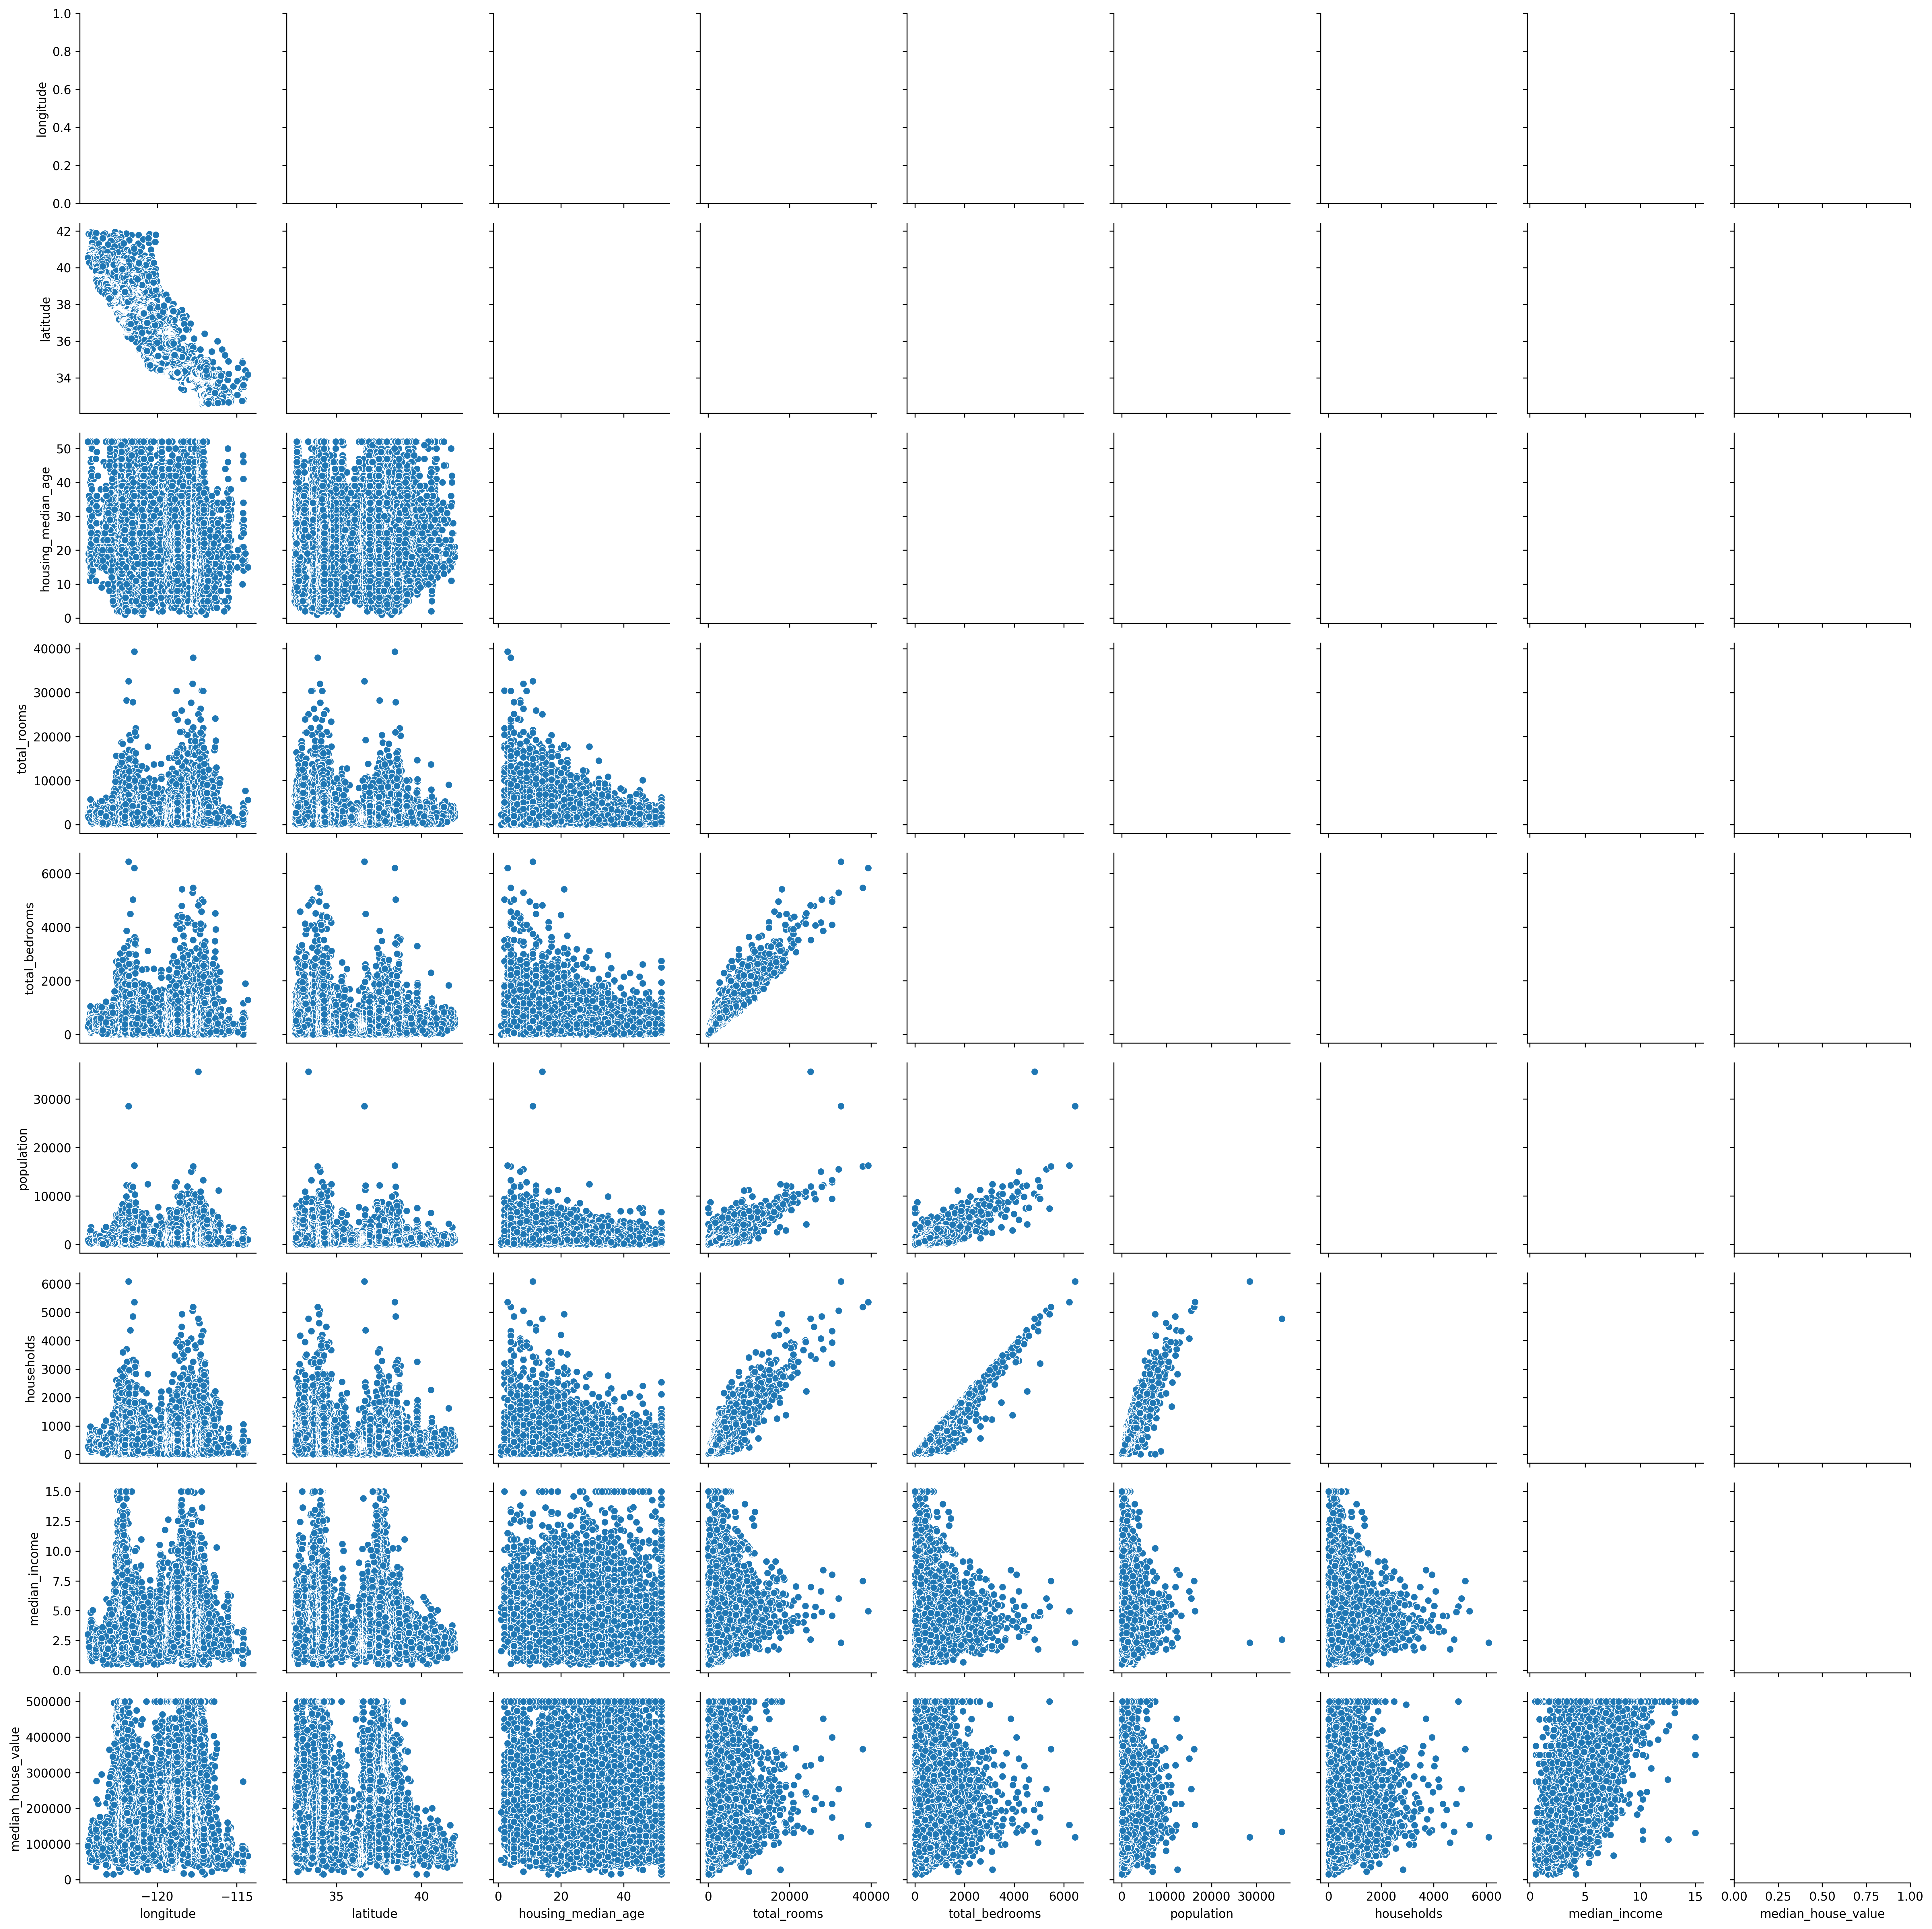

In [ ]:
X = df.drop(columns=target)

num_cols = list(X.select_dtypes(exclude=object).columns)
cat_cols = list(X.select_dtypes(include=object).columns)
g = sns.PairGrid(df, x_vars=num_cols + [target], y_vars=num_cols + [target])
g.map_lower(sns.scatterplot)
plt.tight_layout()
plt.show()

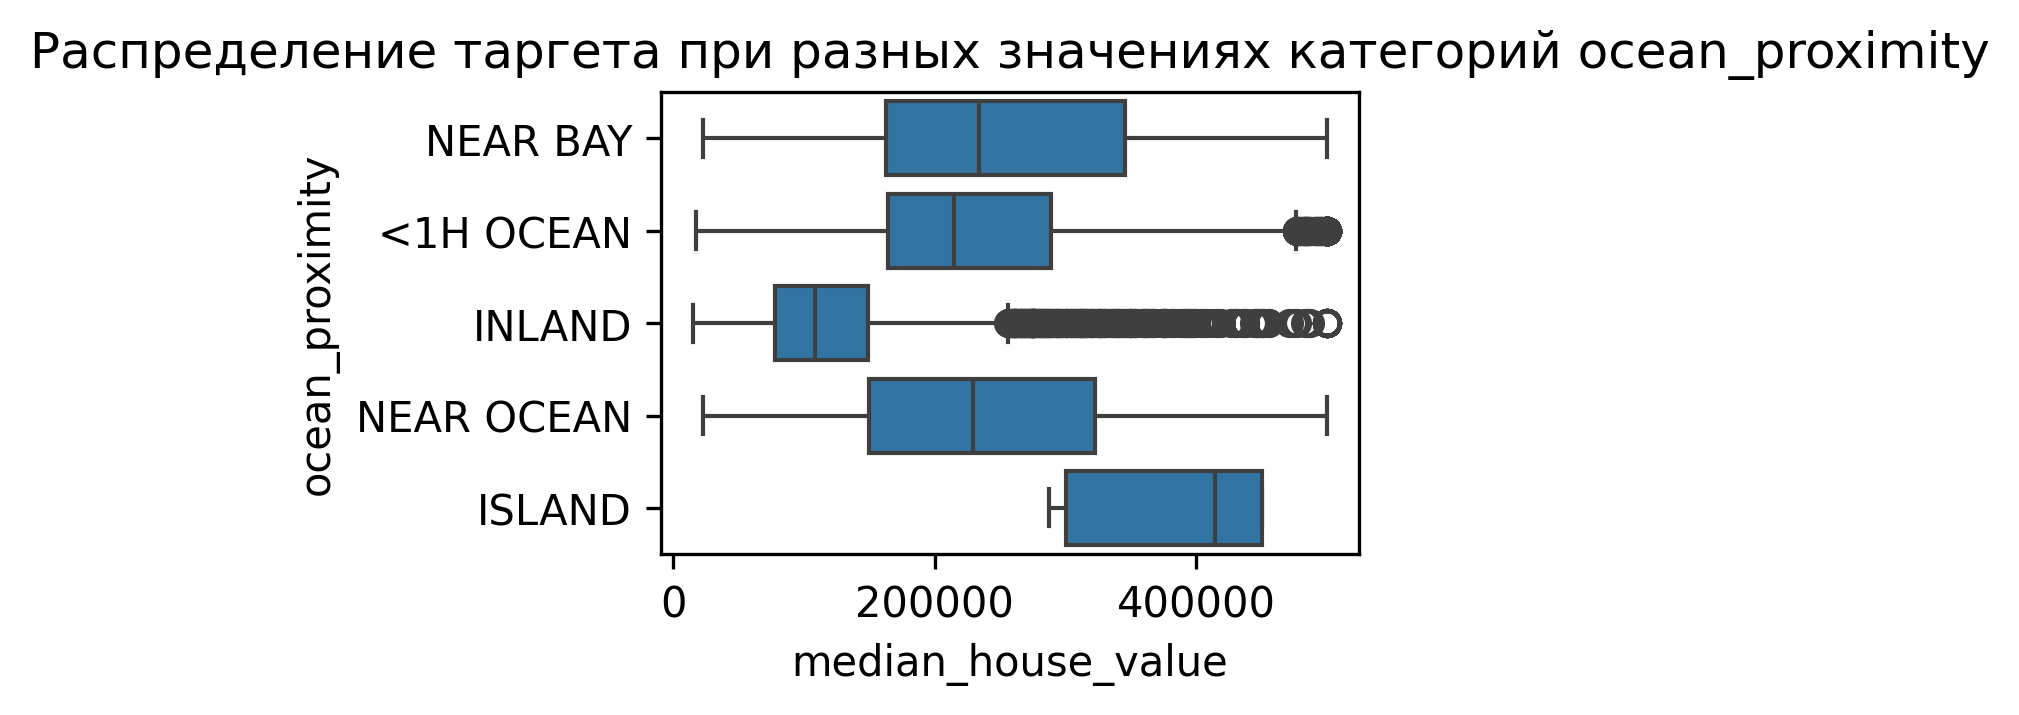

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(3, 2))
    sns.boxplot(df, x=target, y=col)
    plt.title(f"Распределение таргета при разных значениях категорий {col}")
    plt.show()

В зависимости от категории распределение таргета сильно меняется. Использование этого признака довольно перспективно (чтобы узнать, как использовать категориальные признаки в моделях, можно найти соответствующий материал в интернете)

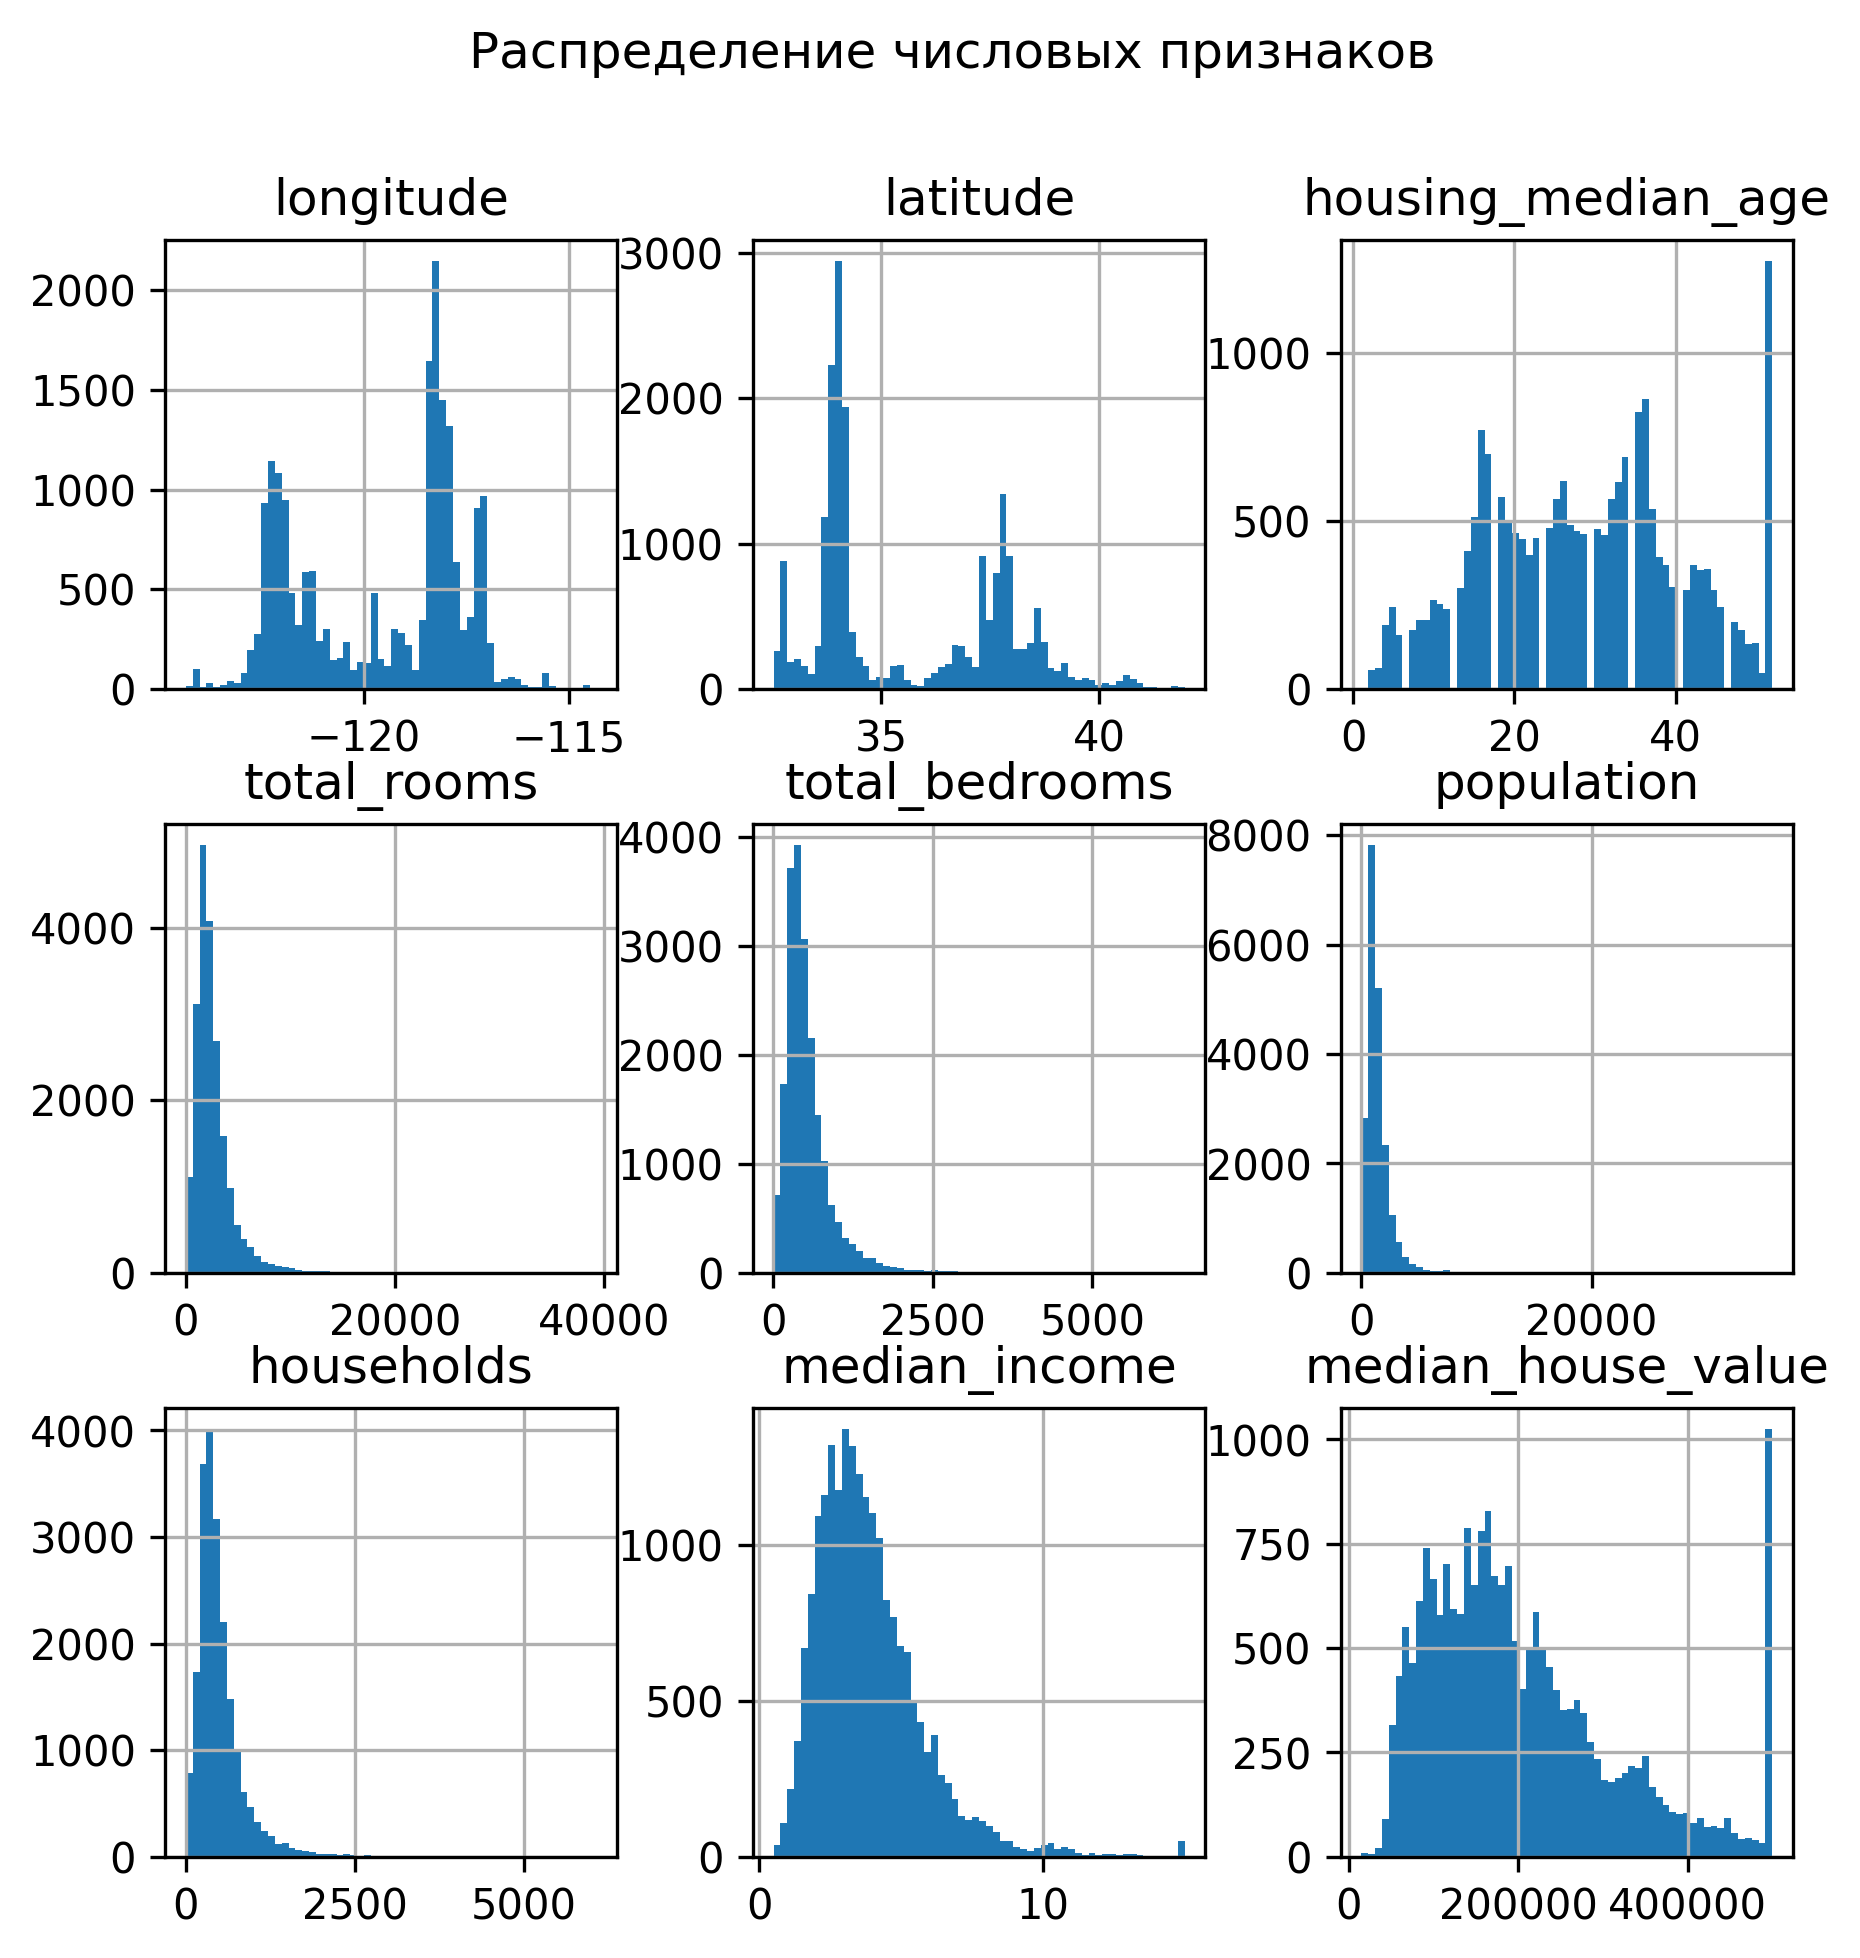

In [ ]:
ax = df.hist(bins=60, figsize=(7, 7))
plt.suptitle("Распределение числовых признаков")
plt.show()

### Аномалии

Можно заметить неожиданные пики для признаков `median_house_value` и `housing_median_age`. Давайте рассмотрим их поподробнее.

`median_house_value`:

In [ ]:
print("Самые частые значения:")
df["median_house_value"].value_counts()

Самые частые значения:


median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: count, Length: 3842, dtype: int64

In [ ]:
weird_value = 500001.0
df_weird_info = df[df["median_house_value"] == weird_value].describe()
df_weird_info

longitude    latitude  housing_median_age   total_rooms  \
count  965.000000  965.000000          965.000000    965.000000   
mean  -119.702477   35.225751           33.802073   2961.968912   
std      1.946521    1.783949           13.027787   2162.502126   
min   -122.640000   32.680000            2.000000      8.000000   
25%   -122.120000   33.970000           24.000000   1668.000000   
50%   -118.480000   34.130000           34.000000   2518.000000   
75%   -118.330000   37.400000           44.000000   3542.000000   
max   -116.430000   38.910000           52.000000  18132.000000   

       total_bedrooms   population   households  median_income  \
count      958.000000   965.000000   965.000000     965.000000   
mean       501.782881  1112.808290   465.973057       7.825123   
std        398.408898   813.321776   361.299205       3.245021   
min          1.000000    13.000000     1.000000       0.499900   
25%        266.000000   636.000000   252.000000       5.239100   
50%        401.000000   927.000000   374.000000       7.719700   
75%        609.500000  1347.000000   574.000000      10.112200   
max       5419.000000  7431.000000  4930.000000      15.000100   

       median_house_value  
count               965.0  
mean             500001.0  
std                   0.0  
min              500001.0  
25%              500001.0  
50%              500001.0  
75%              500001.0  
max              500001.0

In [ ]:
((df_weird_info - df_info) / df_weird_info).loc[["mean", "std"]]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
mean   0.001109 -0.011529            0.152730     0.110131       -0.071919   
std   -0.029289 -0.197317            0.033945    -0.008838       -0.057670   

      population  households  median_income  median_house_value  
mean   -0.280972   -0.072036       0.505353            0.586289  
std    -0.392391   -0.058208       0.414543                -inf

Вероятно это максимально допустимое значение признака, и если значение больше, то оно приравнивается к 500001.0

При этом факт того, что этих значений так много, довольно подозрителен

`housing_median_age`:

In [ ]:
df["housing_median_age"].value_counts()

housing_median_age
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64

In [ ]:
weird_value = 52.0

df_weird_info = df[df["housing_median_age"] == weird_value].describe()
df_weird_info

longitude     latitude  housing_median_age  total_rooms  \
count  1273.000000  1273.000000              1273.0  1273.000000   
mean   -120.885915    36.605161                52.0  1858.655931   
std       1.971172     1.919859                 0.0   963.294942   
min    -124.350000    32.660000                52.0     8.000000   
25%    -122.410000    34.120000                52.0  1217.000000   
50%    -122.220000    37.750000                52.0  1803.000000   
75%    -118.350000    37.800000                52.0  2432.000000   
max    -116.880000    41.320000                52.0  6186.000000   

       total_bedrooms   population   households  median_income  \
count     1265.000000  1273.000000  1273.000000    1273.000000   
mean       403.764427   934.271013   378.365279       3.889047   
std        245.554703   529.536922   224.136079       2.307418   
min          1.000000     8.000000     1.000000       0.499900   
25%        249.000000   591.000000   240.000000       2.472200   
50%        367.000000   879.000000   353.000000       3.450000   
75%        501.000000  1170.000000   475.000000       4.446400   
max       2747.000000  6675.000000  2538.000000      15.000100   

       median_house_value  
count         1273.000000  
mean        275420.871170  
std         139070.897688  
min          14999.000000  
25%         161400.000000  
50%         259400.000000  
75%         380400.000000  
max         500001.000000

In [ ]:
((df_weird_info - df_info) / df_weird_info).loc[["mean", "std"]]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
mean   0.010888  0.026589            0.449241    -0.418102       -0.332140   
std   -0.016417 -0.112557                -inf    -1.264743       -0.716054   

      population  households  median_income  median_house_value  
mean   -0.525764   -0.320258       0.004725            0.248946  
std    -1.138590   -0.705793       0.176646            0.170239

Предположение относительно `housing_medium_age` аналогично прошлому признаку, при этом аномальное значение тут тоже самое частое

### Корреляции

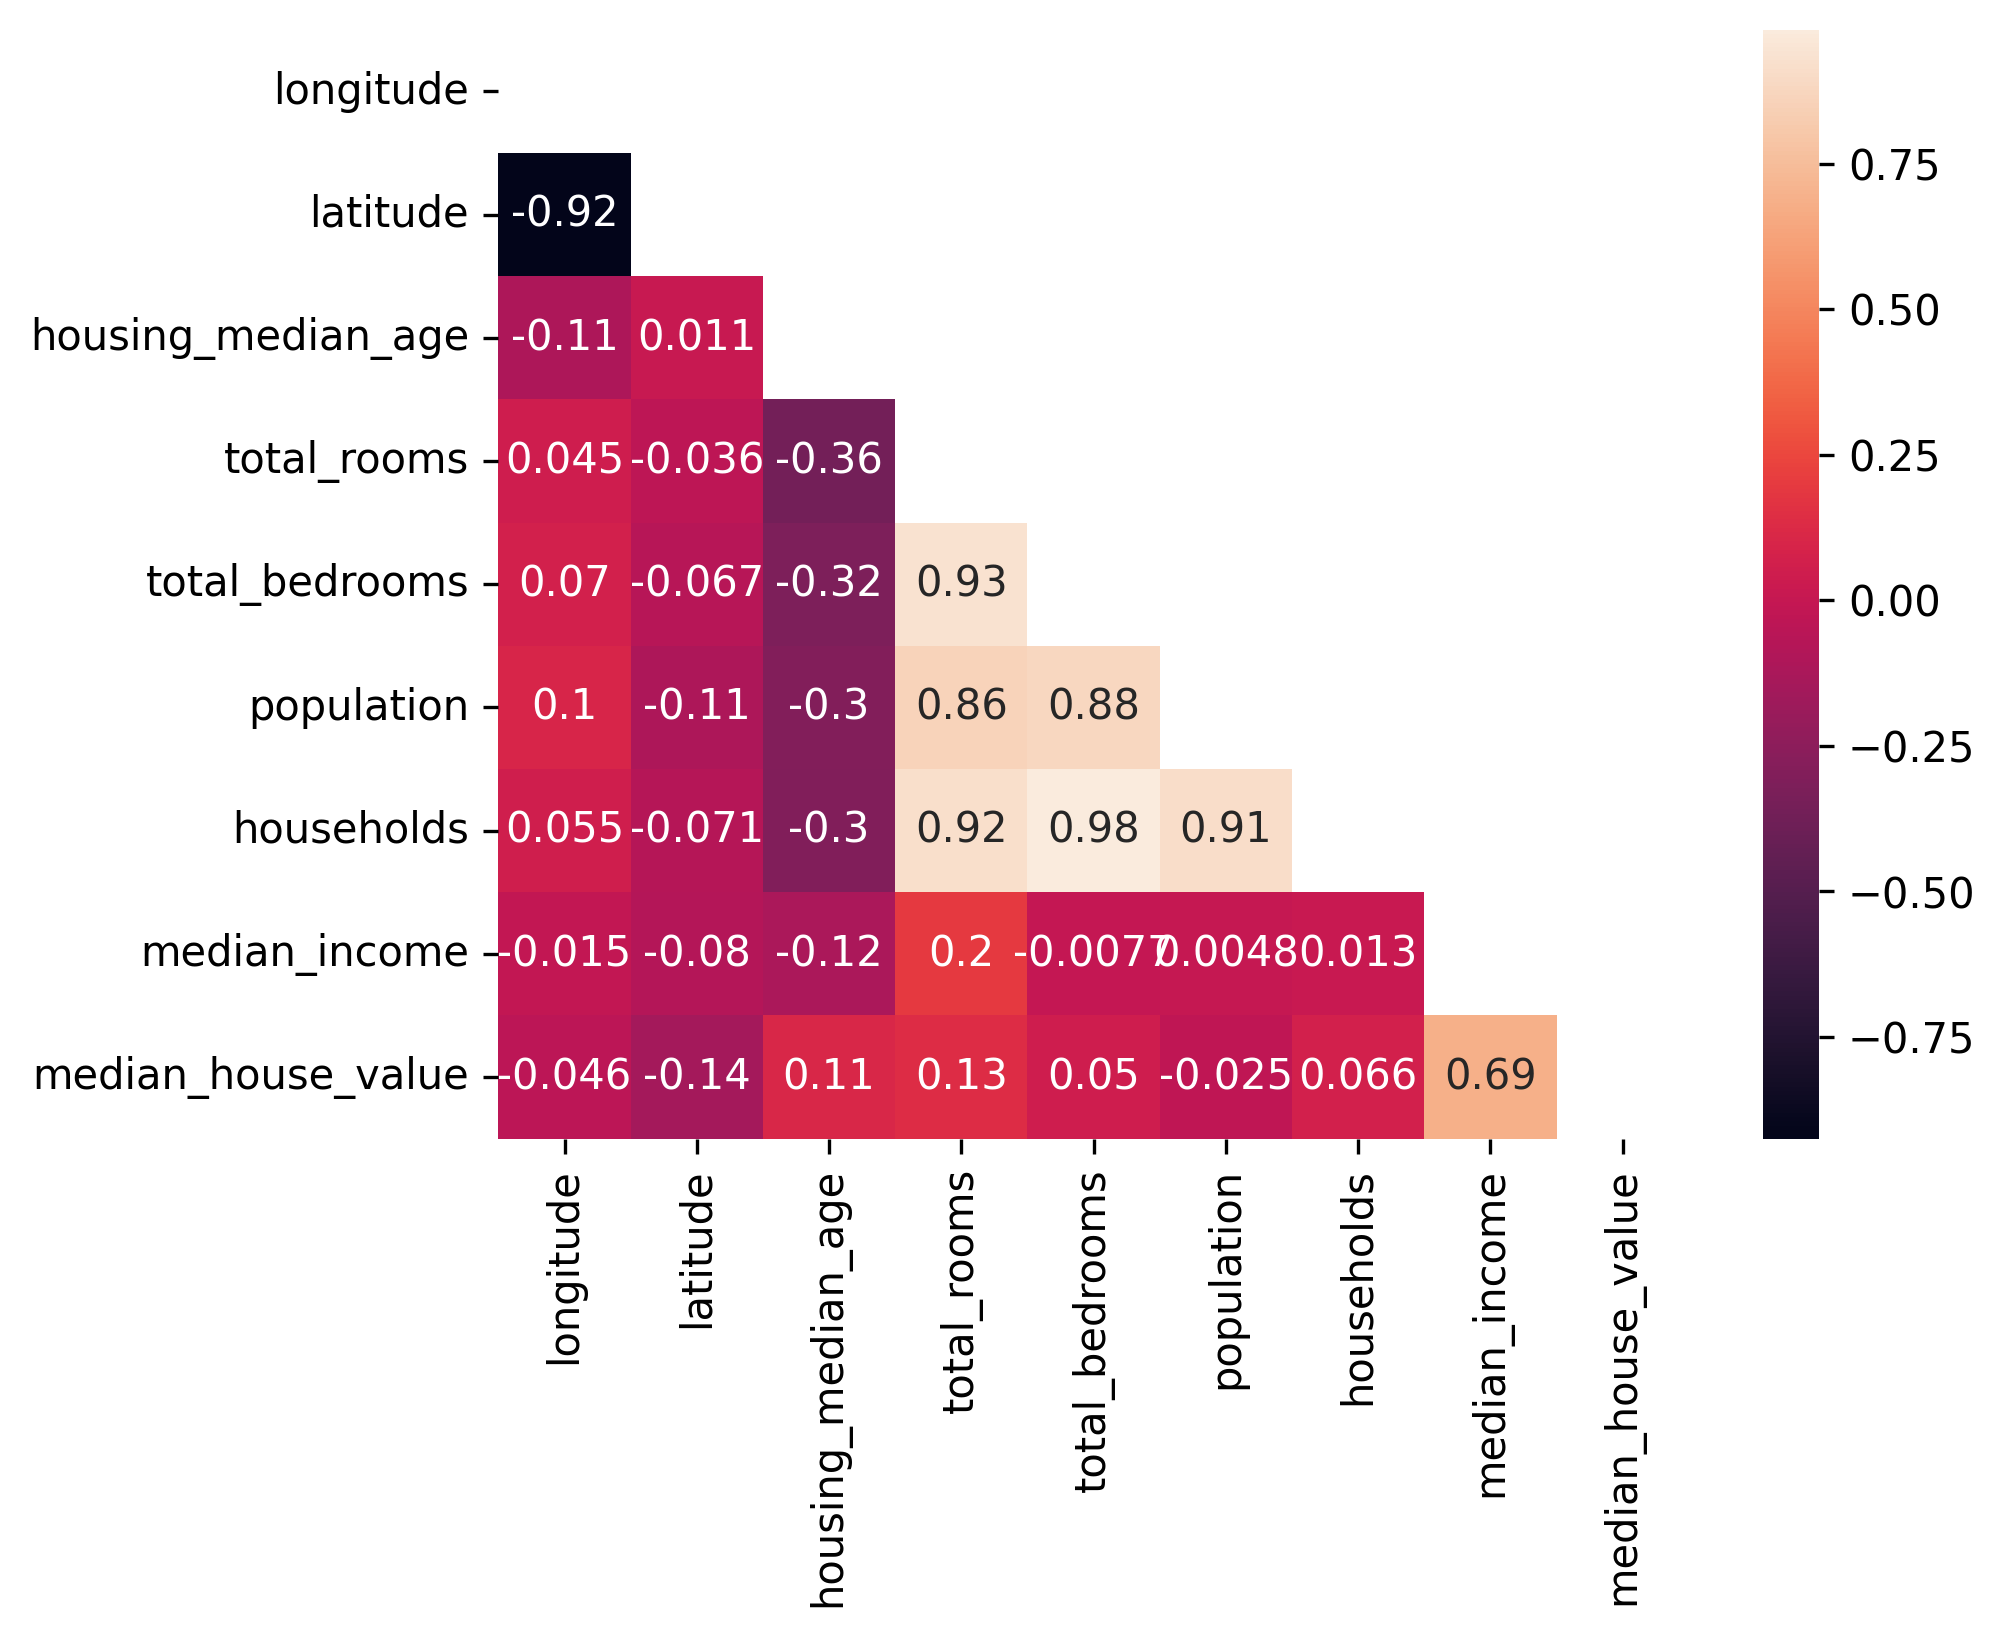

In [ ]:
df_corr = df[num_cols + [target]].corr()
mask = np.triu(df_corr).astype(bool)
sns.heatmap(df_corr, annot=True, mask=mask)
plt.show()

## Обучение

Выделим таргет и признаки для обучения модели

In [ ]:
X = df.drop(columns=[target, "ocean_proximity"])
X = X.fillna(0)
y = df[target]

Обучим линейную регрессию

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
pred = model.predict(X)
pred

array([407505.50944158, 424024.26248191, 378143.30017657, ...,
        26818.36924554,  38940.16898274,  55084.87697207])

Средняя абсолютная ошибка: 51051.257
Средняя абсолютная процентная ошибка: 0.305


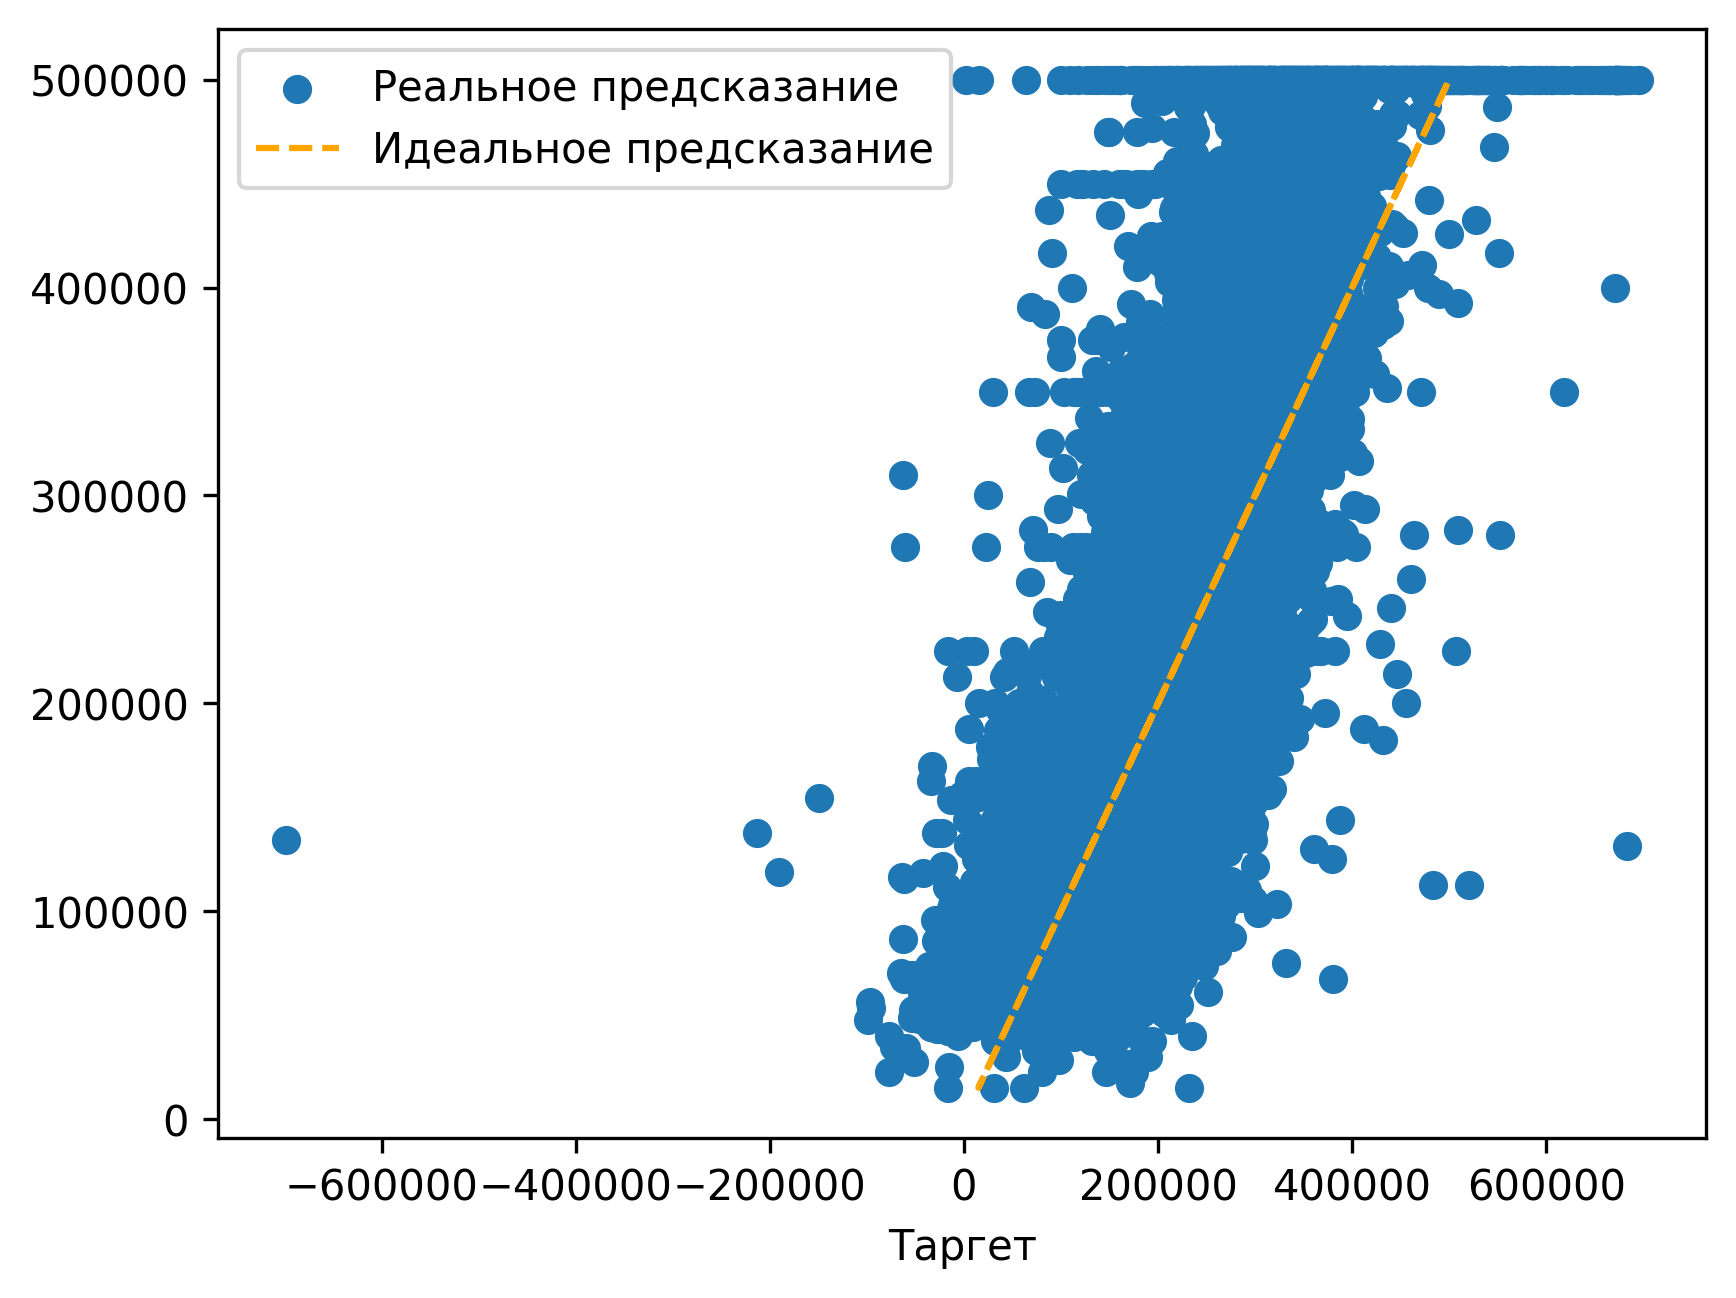

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


def model_summary(y_true, y_pred):
    mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
    mape = mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    print(f"Средняя абсолютная ошибка: {mae:.3f}")
    print(f"Средняя абсолютная процентная ошибка: {mape:.3f}")

    plt.scatter(x=y_pred, y=y_true, label="Реальное предсказание")
    plt.plot(y_true, y_true, linestyle="--", color="orange", label="Идеальное предсказание")
    plt.xlabel("Предсказание")
    plt.xlabel("Таргет")
    plt.legend()
    plt.show()


model_summary(y_true=y, y_pred=pred)

Сделаем тестовую выборку

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

Средняя абсолютная ошибка: 52615.059
Средняя абсолютная процентная ошибка: 0.312


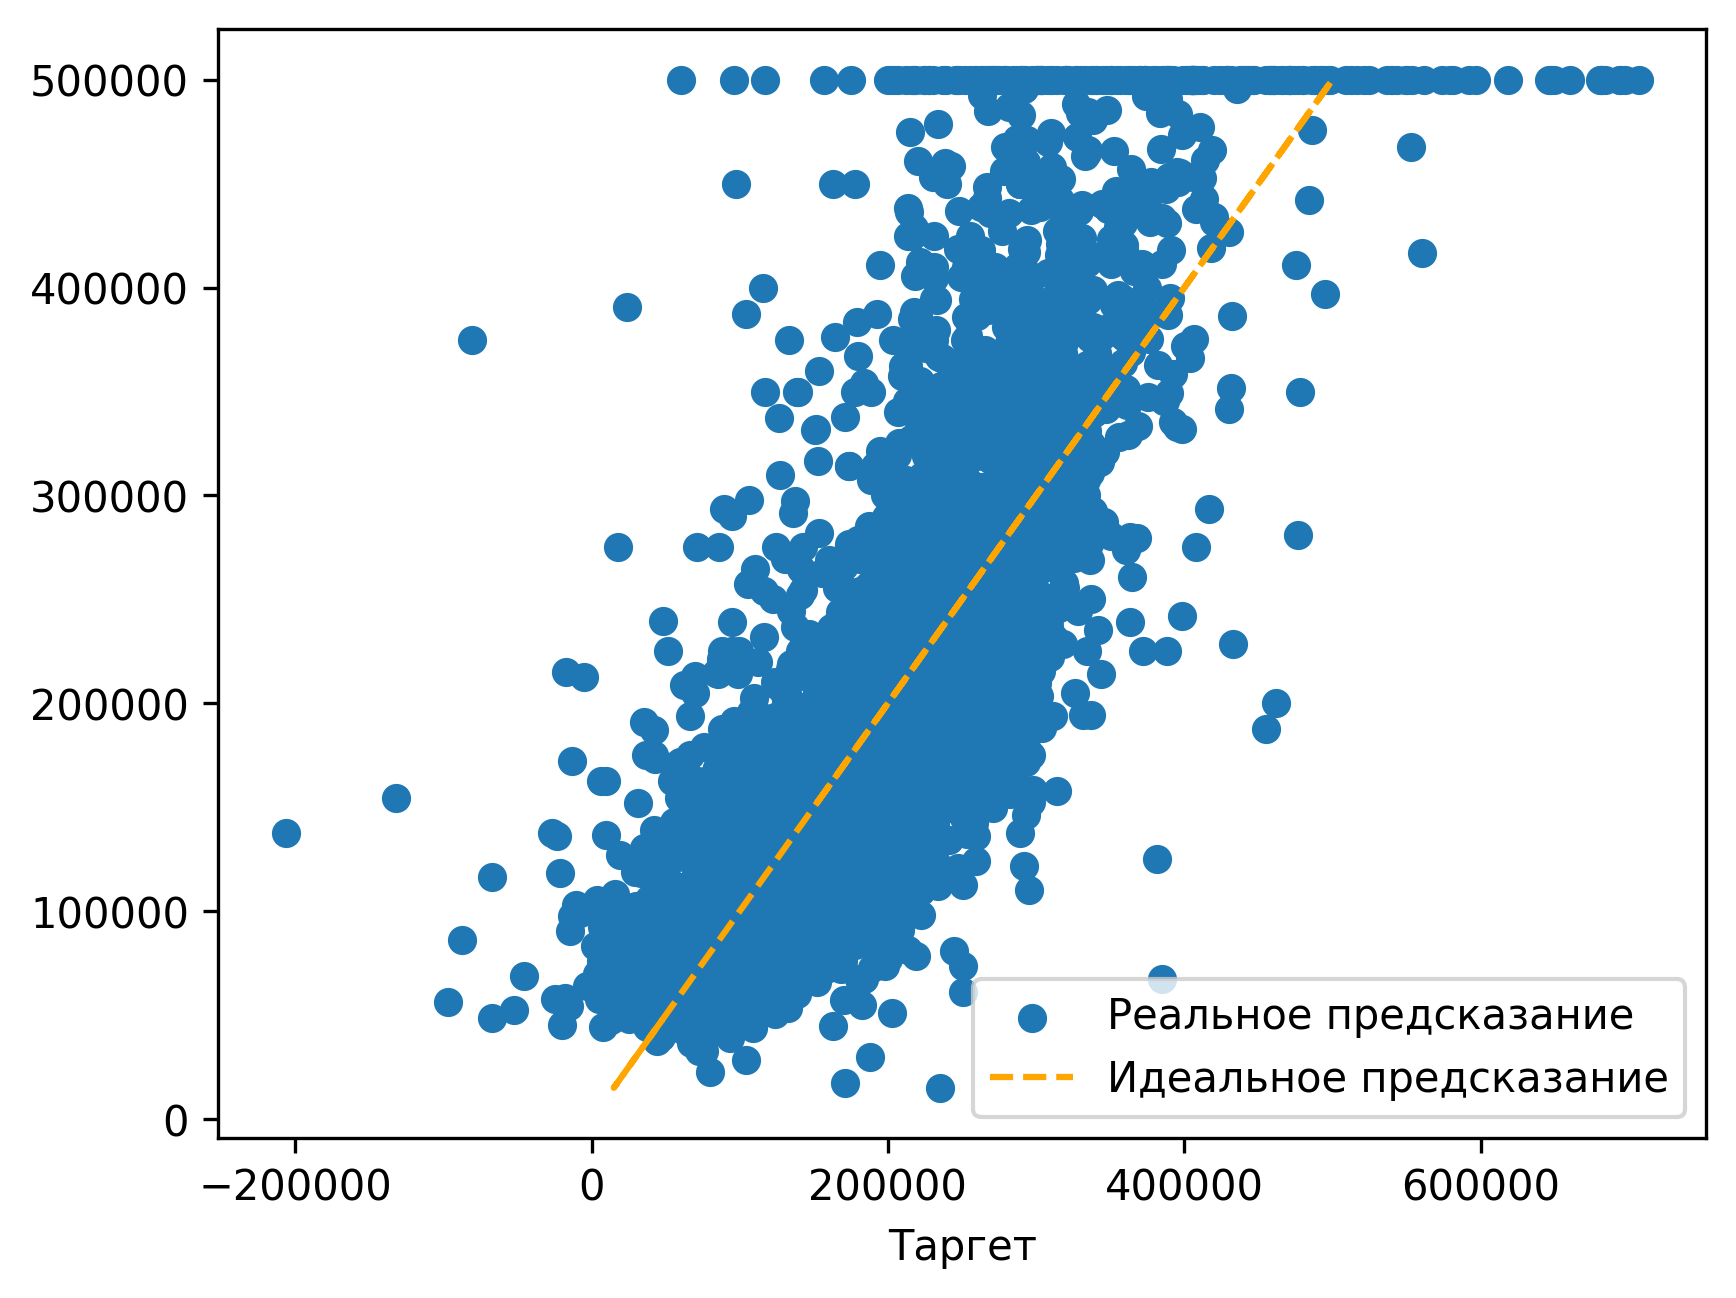

In [ ]:
model_summary(y_true=y_test, y_pred=pred)

Быстрый способ построить качественную модель - использовать бустинг (а точнее кэтбуст - он поддерживает наны и категориальные значения в признаках):

Средняя абсолютная ошибка: 31180.054
Средняя абсолютная процентная ошибка: 0.180


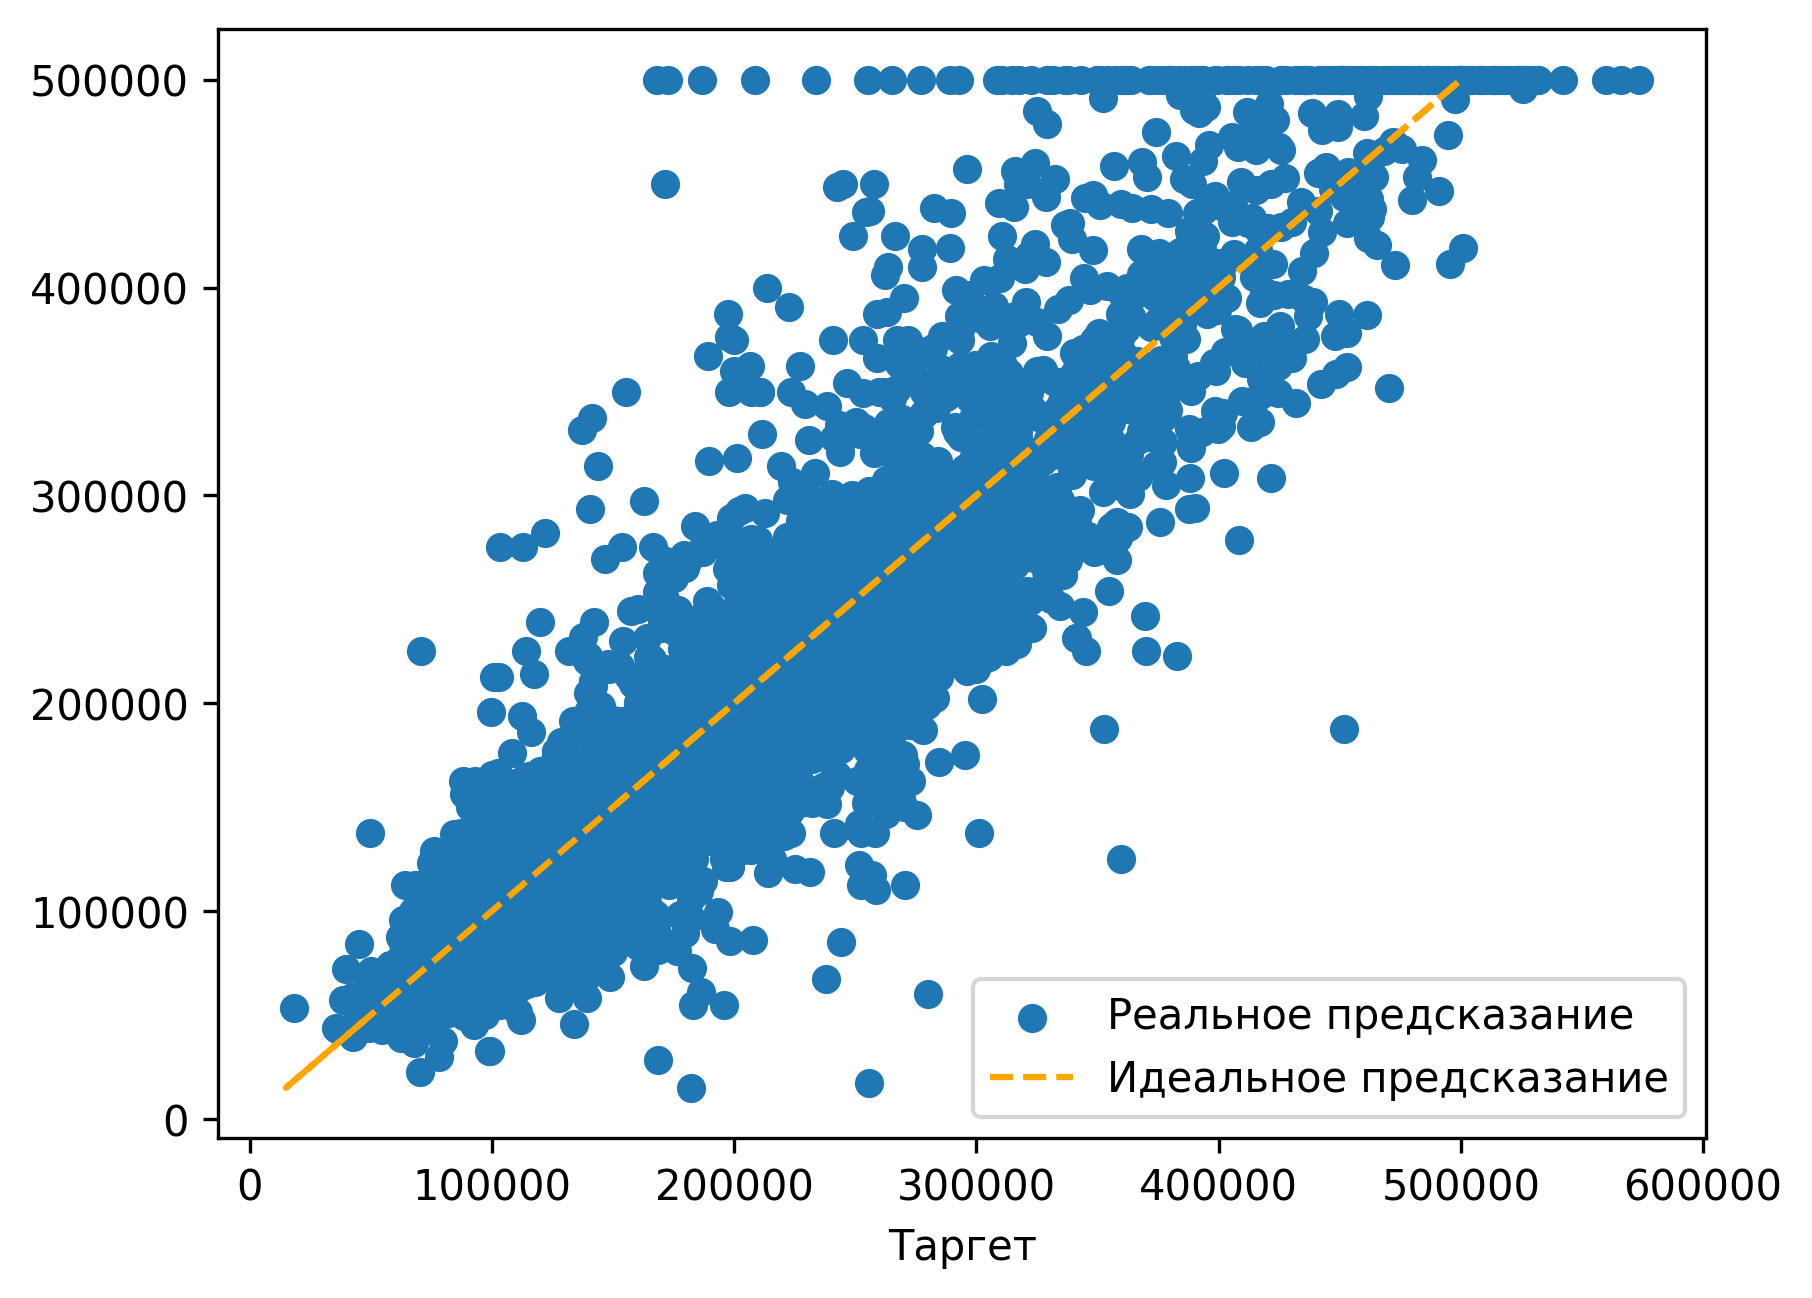

In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(cat_features=cat_cols, allow_writing_files=False)

X = df.drop(columns=target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train, verbose=False)
pred = model.predict(X_test)
model_summary(y_true=y_test, y_pred=pred)

# Базовые метрики для регрессии:

- Корень средняя квадратичной ошибки (RMSE): потенциальная проблема - масштаб ошибки зависит от данных
- Средняя абсолютная ошибка (MAE): аналогично RMSE
- Средняя абсолютная процентная ошибка (MAPE): удобно, так как мы видим, как в среднем прогноз отклоняется в процентах от правильного ответа
- R2: какая доля вариации объясняется предсказанием. Обычно используется в эконометрике, на мой взгляд в реальных ситуациях не нужна

RMSE, MAE и MAPE удобны своей простотой и позволяют быстро оценить качество модели, однако для потребностей бизнеса они часто недостаточны: в реальности нужно делать метрику, которая показывают пользу модели при использовании на практике. Например, если мы делаем модель для решения, предоставлять ли клиенту банка кредит, то метрикой будет средняя прибыль от кредитов при использовании модели.

Часто такую метрику может быть сложно подсчитать, но нужно попытаться сделать такую метрику, которая будет как можно ближе к запросу бизнеса

# Метрики для бинарной классификации:

- Доля правильных ответов (accuracy - часто называют как "точность")
- Точность (precision): расчитывается по формуле $\frac{TP}{TP+FP}$, где FP (False Positive) - доля неправильных положительных ответов, TP (True Positive) - доля правильных положительных ответов
- Полнота (recall): расчитывается по формуле $\frac{TP}{TP+FN}$, где FN (False Negative) - доля неправильных отрицательных ответов
- F1: $\frac{2 * precision * recall}{precision + recall}$ - среднее гармоническое точности и полноты

В классификации полезно исследовать матрицу ошибок (confusion matrix):

pr = 0, rec = 0 => f1 = 0

pr = 0.5, rec = 0.5 => f1 = 0.5

pr = 1, rec = 1 => f1 = 1

pr = 0 => f1 = 0

rec = 0 => f1 = 0

Мы предсказали наличие рака у здорового пациента - False Positive

Мы предсказали отсутствие рака у больного пациента - False Negative

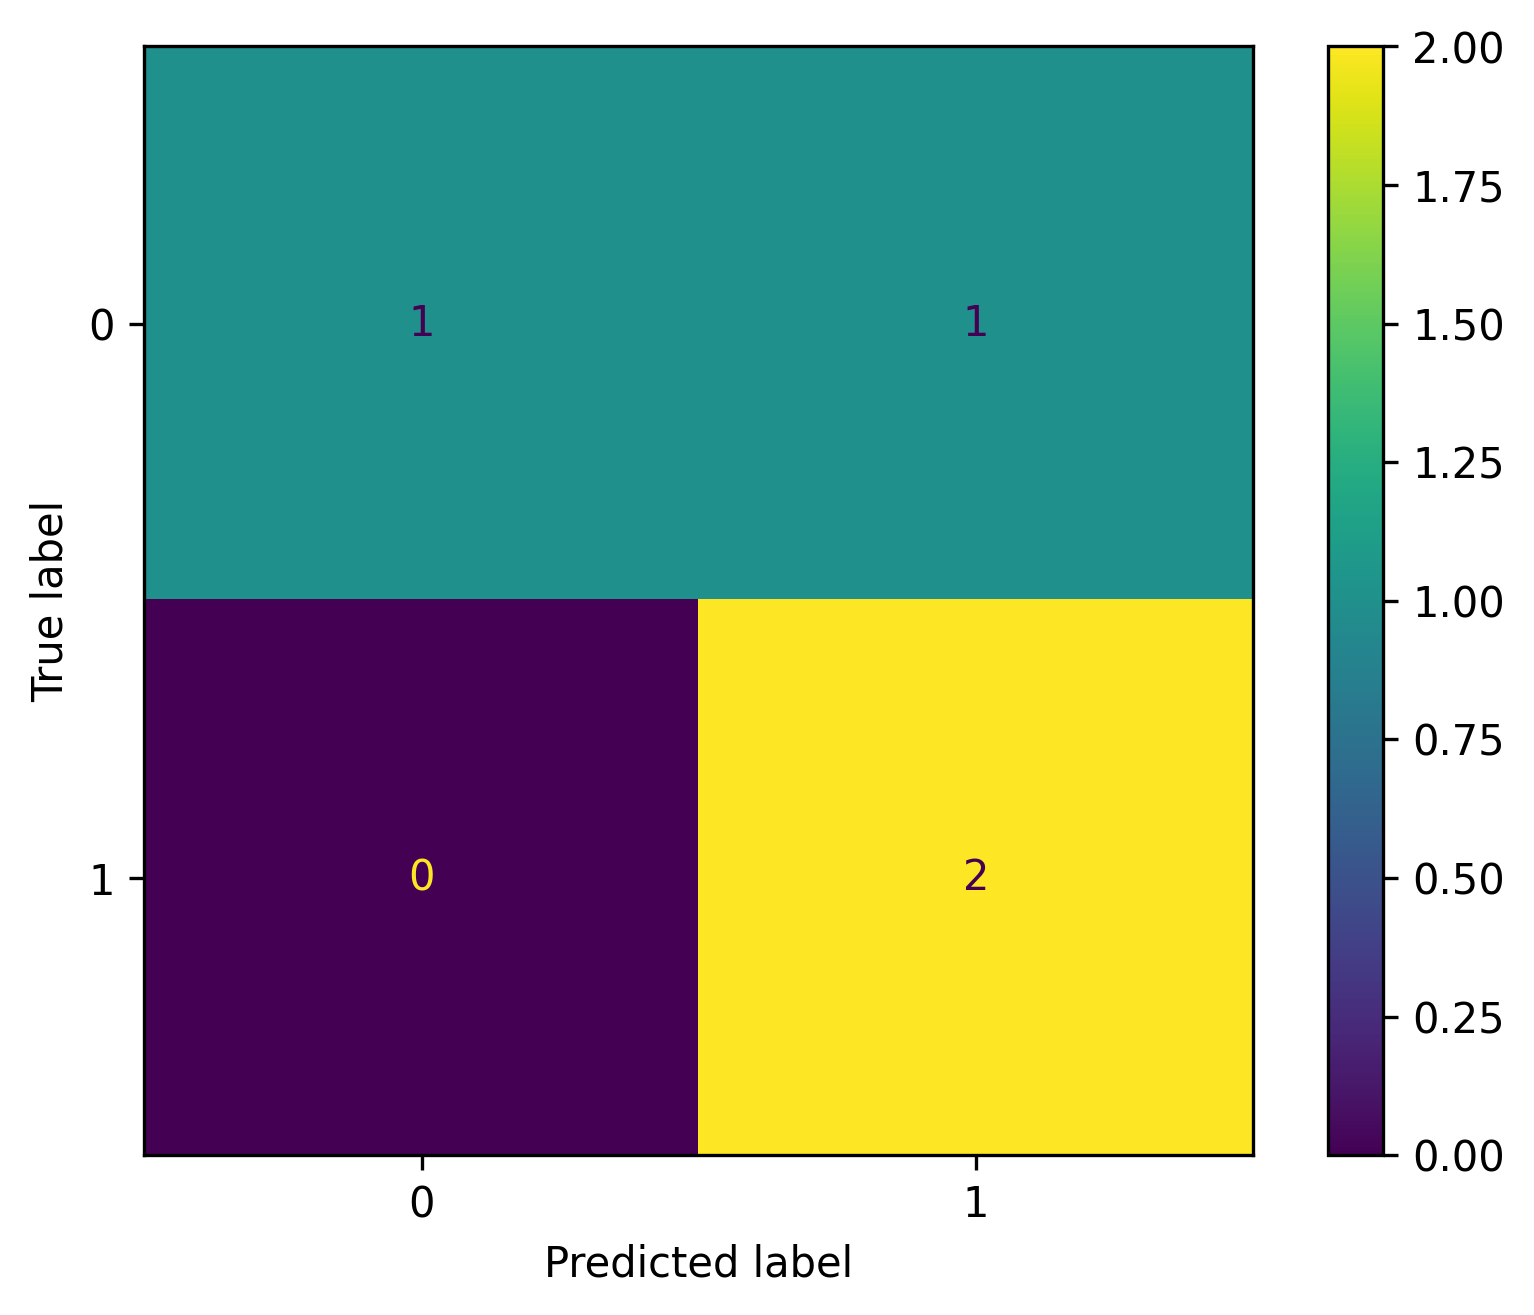

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


preds = np.array([0, 1, 1, 1])
target = np.array([0, 1, 0, 1])
ConfusionMatrixDisplay.from_predictions(y_true=target, y_pred=preds)
plt.show()

# Задания для самостоятельного решения

Ссылки:
- [датасет](https://drive.google.com/file/d/1SDBuPOtEYY5vqtbCrkpsgoGjucNVYFWr/view?usp=sharing)
- [информация о датасете](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)
1. Скачайте датасет, исследуйте его признаки аналогично тому, как это было сделано выше.  
2. Разделите датасет на тренировочную и тестовую выборки с параметрами `random_seed`=420 и `test_size`=0.2, обучите модель классификации, используя модель `CatBoostClassifier` из библиотеки `catboost`. Задача классификации: определить, отменил ли клиент бронь (за это отвечает признак `booking_status`)
3. Посчитайте долю правильных ответов модели на тестовой выборке и выведите матрицу ошибок. Предложите возможное применение этой модели для бизнеса (в чем может быть польза). Как можно построить бизнесовую метрику?